In [1]:
import tensorflow as tf
from Model.Model import SegmentationModel
import Scripts.DataPrepering as dp
import tensorflow_datasets as tfds
from IPython.display import clear_output
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from matplotlib.image import imread 
import numpy as np

In [2]:
print("Import complete")
print("Generating Model")

model = SegmentationModel.generateModel()

Import complete
Generating Model


In [3]:
model.summary()

Model: "SaczewskiMaciej"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 9248        dropout[0][0]                    
____________________________________________________________________________________

In [4]:
print("Compiling model")
print("==============")

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Compiling model


In [5]:
print("Loading and preparing data")
print("==============")

Loading and preparing data


In [6]:
dp.resizeImagesInFolder("Data/images", 128, 128)
dp.resizeImagesInFolder("Data/labels", 128, 128)

In [7]:
X = dp.loadImages("Data/images")
Y = dp.loadMasks("Data/labels")
del X[29]
del Y[29]

X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

In [8]:
Y = Y>0
Y = Y.astype(int)

In [9]:
X, Y = dp.normalize(X, Y)

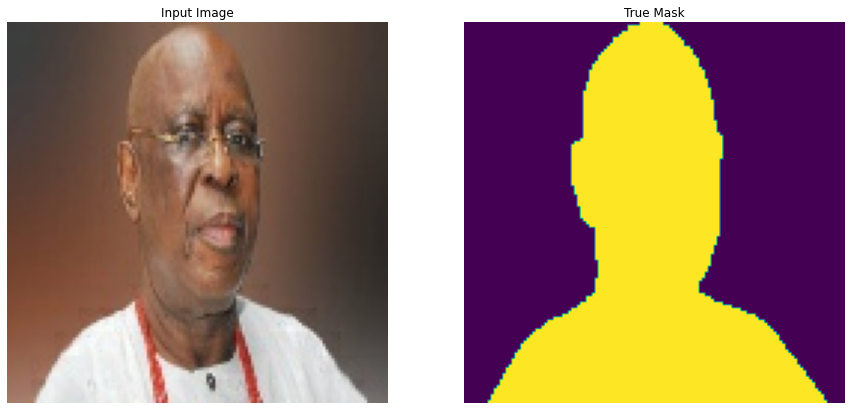

In [10]:
dp.display([X[12], Y[12]])

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
# print("Train set:\n X:"+str(X_train.shape)+" y:"+str(y_train.shape)+"\n Test set:\n X:"+str(X_test.shape)+" y:"+str(y_test.shape))

In [ ]:
TRAIN_LENGTH = X.shape[0]
EPOCHS = 25
BATCH_SIZE = 16
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
model_history = model.fit(X, Y, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          batch_size=BATCH_SIZE)
                        
model.save("model")

In [11]:
##Predictions
model = tf.keras.models.load_model('model')

In [24]:
INDEX = 12
test = X[INDEX]
test = np.reshape(test, (1,128,128,3))
predict = model.predict(test)

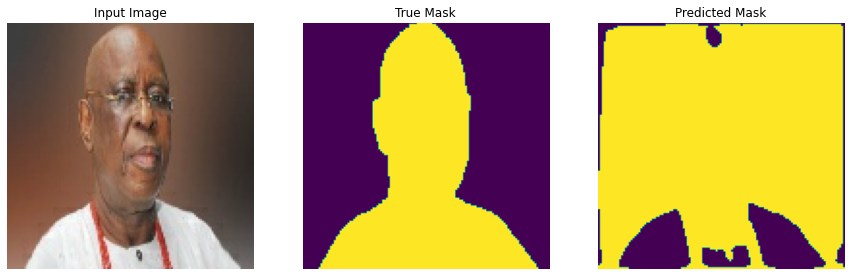

In [25]:

dp.display([X[INDEX], Y[INDEX],dp.create_mask(predict)])